In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import os



In [2]:

dir_p = r'C:\Users\Honeyz\Desktop\Aessa\THE_SIS\PyroDataProcessed.csv'
raw_dataset = pd.read_csv(dir_p, skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset

,C% Biomass,H% Biomass,O% Biomass,N% Biomass,C% HDPE,H% HDPE,O% HDPE,N% HDPE,C% PS,H% PS,O% PS,N% PS,Time,Rate,Ratio,Temp,Oil%,Char%,Gas%
0,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,66.7,500,60.156065,10.936392,28.907543
1,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,100.0,500,56.000000,0.000000,44.000000
2,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,50.0,500,45.993999,17.313035,36.692966
3,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,33.3,500,44.038082,23.267154,32.694764
4,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,0.0,500,25.762381,34.435228,39.802391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,60.0,550,16.633680,15.340660,13.907280
243,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,61.5,550,15.999231,14.779844,13.749581
244,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,63.0,550,15.349117,14.221099,13.605475
245,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,64.5,550,14.683338,13.664426,13.474963


In [3]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, :16].values
y = dataset.iloc[:, 16:].values

#divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [5]:
# Create the SVR regressor
svr = SVR(kernel='linear',epsilon=3)
# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)
# Train the regressor
mor = mor.fit(X_train, y_train)

In [6]:


# Generate predictions for testing data
y_pred = mor.predict(X_test)

# Evaluate the regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}- Third regressor: {mse_three}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}- second regressor: {mae_three}') 


MSE for first regressor: 54.191778614774684 - second regressor: 8.062925344064672- Third regressor: 15.249141997929105
MAE for first regressor: 4.943472586623251 - second regressor: 2.406951249941207- second regressor: 2.5608941848421694


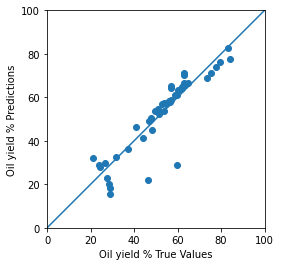

In [7]:
# Predicting a new result

Pred_oil = y_pred[:,0]
test_oil = y_test[:,0]
Pred_char = y_pred[:,1]
test_char = y_test[:,1]
Pred_gas = y_pred[:,2]
test_gas = y_test[:,2]


a = plt.axes(aspect='equal')
plt.scatter(test_oil, Pred_oil)
plt.xlabel('Oil yield % True Values')
plt.ylabel('Oil yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


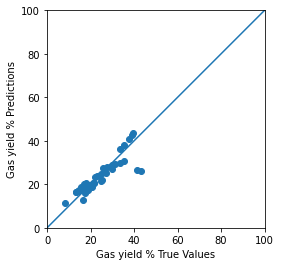

In [8]:
a = plt.axes(aspect='equal')
plt.scatter(test_gas, Pred_gas)
plt.xlabel('Gas yield % True Values')
plt.ylabel('Gas yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

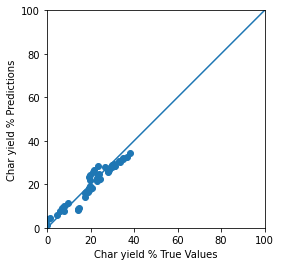

In [9]:
a = plt.axes(aspect='equal')
plt.scatter(test_char, Pred_char)
plt.xlabel('Char yield % True Values')
plt.ylabel('Char yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)